Dimensionality Reduction
--------------------------

 Many Machine Learning problems involve thousands or even millions of features for
 each training instance. Not only do all these features make training extremely slow,
 but they can also make it much harder to find a good solution, as we will see. This
 problem is often referred to as the curse of dimensionality.

Apart from speeding up training, dimensionality reduction is also extremely useful
 for data visualization

Then, we will consider the two main approaches
 to dimensionality reduction (projection and Manifold Learning), and we will go
 through three of the most popular dimensionality reduction techniques: PCA, Kernel
 PCA, and LLE

#### PCA

Principal Component Analysis (PCA) is by far the most popular dimensionality reduc
tion algorithm. First it identifies the hyperplane that lies closest to the data, and then
 it projects the data onto it, just like in

In [298]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import fetch_openml, make_swiss_roll
from sklearn.decomposition import IncrementalPCA, KernelPCA

In [299]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))

# 3d dataset
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

Text(0.5, 0, '$x_3$')

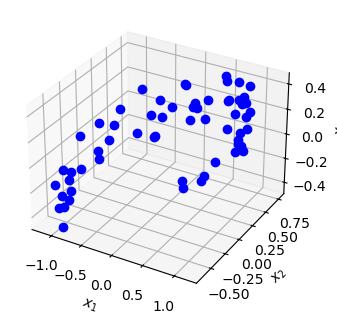

In [300]:
fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:, 0], X[:, 1], X[:, 2], "bo")

ax.set_xlabel("$x_1$", )
ax.set_ylabel("$x_2$",)
ax.set_zlabel("$x_3$",)


obtaining the pricipal components.

In [301]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
c3 = Vt.T[:, 2]

print(c1)
print(c2)
print(c3)

X_centered.shape

[0.93636116 0.29854881 0.18465208]
[-0.34027485  0.90119108  0.2684542 ]
[-0.08626012 -0.31420255  0.94542898]


(60, 3)

In [302]:
# projecting the training set onto the plane defined by the first two principal components

W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

X2D.shape

# You now know how to reduce the dimensionality of any dataset
#  down to any number of dimensions  while preserving as much variance as possible

(60, 2)

 now using scikit-learn

In [303]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

X2D.shape

(60, 2)

In [304]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [305]:
# getting the explained variance ratio

pca.explained_variance_ratio_


# This output tells you that 84.2% of the dataset’s variance lies along the first PC, and
#  14.6% lies along the second PC. This leaves less than 1.2% for the third PC, so it is
#  reasonable to assume that the third PC probably carries little information.


array([0.84248607, 0.14631839])

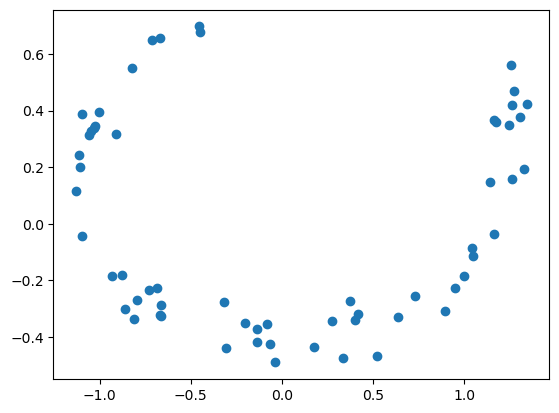

In [306]:
# visualizing in 2D

plt.scatter(X2D[:,0], X2D[:, 1])

Choosing the Right Number of Dimensions

In [307]:
# The following code performs PCA without reducing dimensionality, then computesthe minimum number of dimensions required to preserve 95% of the training set’s
#  variance:

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

pca = PCA(n_components=d)
X2D = pca.fit_transform(X)

X2D.shape


(60, 2)

In [308]:
# You can also set n_components to be a float between 0.0 and 1.0, indicating the ratio  of variance you wish to preserve


pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

X_reduced.shape

(60, 2)

using the mnist data of 28x28, show dimensions of 784

In [309]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [310]:
X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [311]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

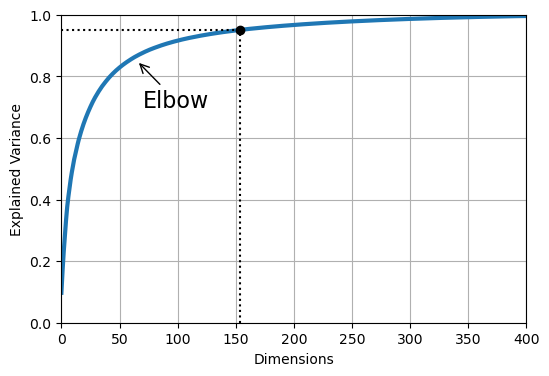

In [312]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

 The following code compresses the MNIST dataset down to 154 dimensions, then
 uses the inverse_transform() method to decompress it back to 784 dimensions

In [313]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

Text(0.5, 1.0, 'Compressed')

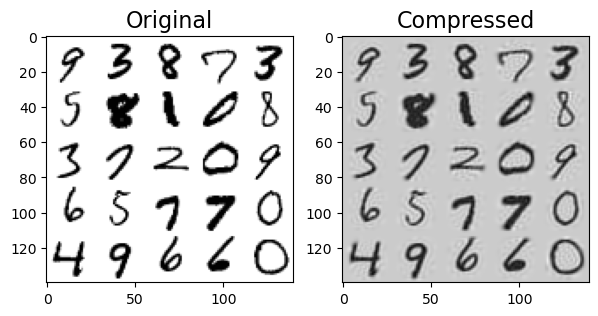

In [314]:

# EXTRA
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)


plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)


Randomized PCA

If you set the svd_solver hyperparameter to "randomized", Scikit-Learn uses a stochastic algorithm called Randomized PCA that quickly finds an approximation of the first d principal components.

In [315]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)

Incremental PCA

One problem with the preceding implementations of PCA is that they require the whole training set to fit in memory in order for the algorithm to run. Fortunately,
Incremental PCA (IPCA) algorithms have been developed. They allow you to split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time

In [316]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

Kernel PCA

PCA, making it possible to perform complex nonlinear projections for dimensionality reduction. This is called Kernel PCA (kPCA)

In [317]:

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

<>:8: SyntaxWarning: invalid escape sequence '\g'
<>:8: SyntaxWarning: invalid escape sequence '\g'
<>:8: SyntaxWarning: invalid escape sequence '\g'
<>:8: SyntaxWarning: invalid escape sequence '\g'
C:\Users\Acer\AppData\Local\Temp\ipykernel_39816\3505658780.py:8: SyntaxWarning: invalid escape sequence '\g'
  for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
C:\Users\Acer\AppData\Local\Temp\ipykernel_39816\3505658780.py:8: SyntaxWarning: invalid escape sequence '\g'
  for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):


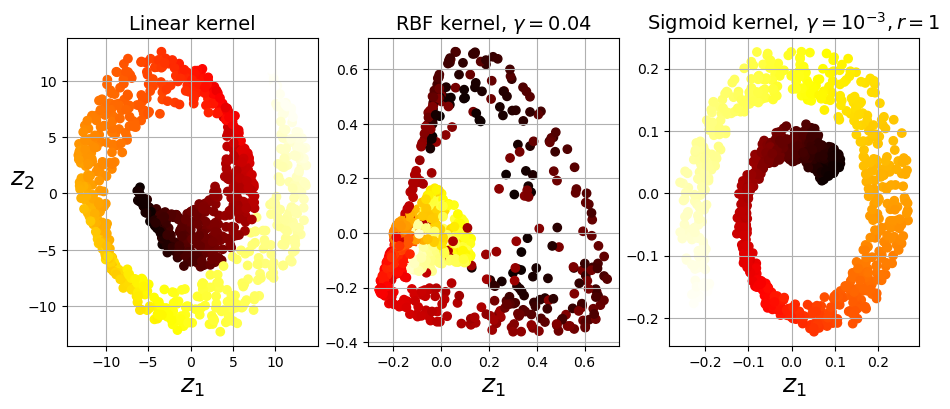

In [318]:
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)


plt.show()

##### Selecting a Kernel and Tuning Hyperparameters

 As kPCA is an unsupervised learning algorithm, there is no obvious performance
 measure to help you select the best kernel and hyperparameter values. That said,
 dimensionality reduction is often a preparation step for a supervised learning task
 (e.g., classification),

First we reduce dimensionality to two dimensions using kPCA, then applying Logistic Regression for classification. Then use GridSearchCV to find the
best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline.

In [319]:
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [320]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


#####  LLE

 Locally Linear Embedding (LLE),  It is a Manifold Learning technique that does not rely on
 projections, like the previous algorithms do. In a nutshell, LLE works by first measur
ing how each training instance linearly relates to its closest neighbors (c.n.), and then
 looking for a low-dimensional representation of the training set where these local
 relationships are best preserved (more details shortly)

In [321]:
lle =  LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced =  lle.fit_transform(X)